<a href="https://colab.research.google.com/github/ZotiScripts/swin-transformer-cifar100-thesis/blob/main/swin_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade torch torchvision matplotlib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


# Import Libraries



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm


# Setup Device

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)


Using device: cuda


# Data Preparation

In [ ]:
# CIFAR-100 mean and std
mean = (0.5071, 0.4865, 0.4409)
std  = (0.2673, 0.2564, 0.2762)

# Transforms
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Datasets
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                              download=True, transform=train_transform)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                             download=True, transform=test_transform)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)


100%|██████████| 169M/169M [00:03<00:00, 44.0MB/s]


# Baseline Model: ResNet-18

In [ ]:
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 100)  # 100 classes for CIFAR-100
model = model.to(device)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 105MB/s]


# Loss and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


# Training & Validation Loop

In [ ]:
num_epochs = 20

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(1, num_epochs+1):
    # ----- Training -----
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch} [Train]"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    epoch_train_loss = running_loss / total
    epoch_train_acc = 100.0 * correct / total
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)

    # ----- Validation -----
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

    epoch_val_loss = val_loss / total
    epoch_val_acc = 100.0 * correct / total
    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)

    print(f"Epoch [{epoch}/{num_epochs}] "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}% | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%")


Epoch 1 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1/20] Train Loss: 2.9902, Train Acc: 26.24% | Val Loss: 2.4114, Val Acc: 37.06%


Epoch 2 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2/20] Train Loss: 2.2668, Train Acc: 39.92% | Val Loss: 2.1411, Val Acc: 42.28%


Epoch 3 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3/20] Train Loss: 2.0153, Train Acc: 45.38% | Val Loss: 1.9693, Val Acc: 46.49%


Epoch 4 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4/20] Train Loss: 1.8721, Train Acc: 48.95% | Val Loss: 1.9942, Val Acc: 47.13%


Epoch 5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5/20] Train Loss: 1.7444, Train Acc: 51.77% | Val Loss: 1.7863, Val Acc: 51.28%


Epoch 6 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6/20] Train Loss: 1.6487, Train Acc: 53.85% | Val Loss: 1.7586, Val Acc: 52.63%


Epoch 7 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7/20] Train Loss: 1.5587, Train Acc: 55.68% | Val Loss: 1.7623, Val Acc: 52.48%


Epoch 8 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8/20] Train Loss: 1.4786, Train Acc: 57.77% | Val Loss: 1.6901, Val Acc: 54.27%


Epoch 9 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9/20] Train Loss: 1.4131, Train Acc: 59.45% | Val Loss: 1.7028, Val Acc: 54.17%


Epoch 10 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10/20] Train Loss: 1.3585, Train Acc: 60.77% | Val Loss: 1.7031, Val Acc: 54.51%


Epoch 11 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [11/20] Train Loss: 1.3027, Train Acc: 61.94% | Val Loss: 1.6872, Val Acc: 55.22%


Epoch 12 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [12/20] Train Loss: 1.2449, Train Acc: 63.66% | Val Loss: 1.7262, Val Acc: 54.93%


Epoch 13 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [13/20] Train Loss: 1.1796, Train Acc: 65.04% | Val Loss: 1.6364, Val Acc: 56.48%


Epoch 14 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [14/20] Train Loss: 1.1476, Train Acc: 65.93% | Val Loss: 1.6989, Val Acc: 55.78%


Epoch 15 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [15/20] Train Loss: 1.1033, Train Acc: 66.97% | Val Loss: 1.6290, Val Acc: 57.86%


Epoch 16 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [16/20] Train Loss: 1.0423, Train Acc: 68.81% | Val Loss: 1.6324, Val Acc: 58.09%


Epoch 17 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [17/20] Train Loss: 1.0092, Train Acc: 69.62% | Val Loss: 1.6701, Val Acc: 57.08%


Epoch 18 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [18/20] Train Loss: 0.9717, Train Acc: 70.47% | Val Loss: 1.7350, Val Acc: 56.63%


Epoch 19 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [19/20] Train Loss: 0.9280, Train Acc: 71.37% | Val Loss: 1.7338, Val Acc: 56.49%


Epoch 20 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch [20/20] Train Loss: 0.8878, Train Acc: 72.67% | Val Loss: 1.7079, Val Acc: 57.99%


# Plot Training Curves

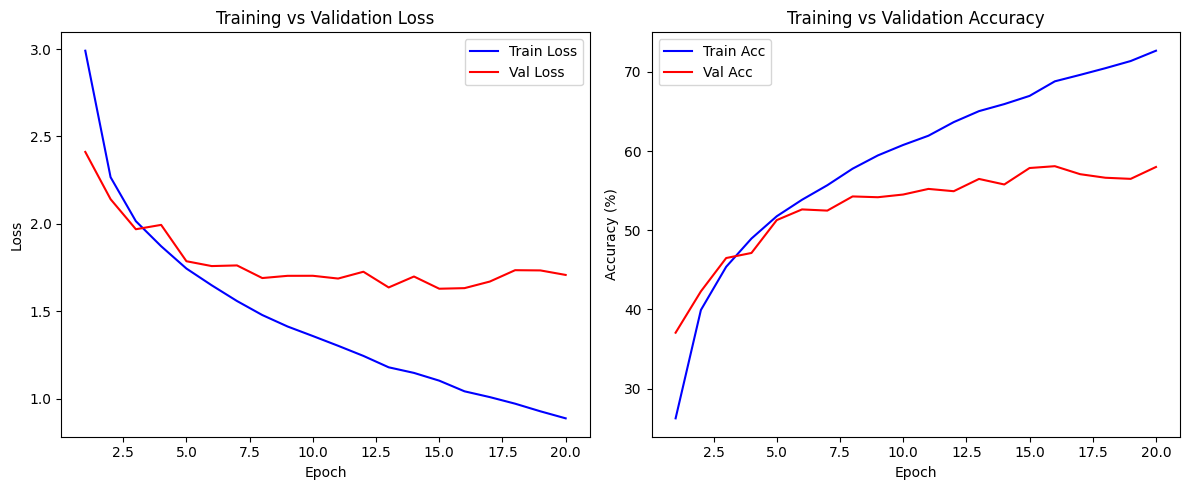

In [ ]:
epochs = range(1, num_epochs+1)

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, 'b-', label='Train Loss')
plt.plot(epochs, val_losses, 'r-', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, train_accs, 'b-', label='Train Acc')
plt.plot(epochs, val_accs, 'r-', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
torch.save(model.state_dict(), "swin_tiny_cifar100.pth")
print("Swin Transformer model saved!")


Swin Transformer model saved!
